In [1]:
import scipy.io as scio
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
%matplotlib inline

Using TensorFlow backend.


In [2]:
test_data_mat = 'D:/GitHub/Neural-Network-Theory-and-Applications-Homework-SJTU2018/Homework Assignment 1/train_test_dataset/test_data.mat'  
test_data = scio.loadmat(test_data_mat)['test_data'] 
test_label_mat = 'D:/GitHub/Neural-Network-Theory-and-Applications-Homework-SJTU2018/Homework Assignment 1/train_test_dataset/test_label.mat'  
test_label = scio.loadmat(test_label_mat)['testlabel'] 
train_data_mat = 'D:/GitHub/Neural-Network-Theory-and-Applications-Homework-SJTU2018/Homework Assignment 1/train_test_dataset/train_data.mat'  
train_data = scio.loadmat(train_data_mat) ['train_data']
train_label_mat = 'D:/GitHub/Neural-Network-Theory-and-Applications-Homework-SJTU2018/Homework Assignment 1/train_test_dataset/train_label.mat'  
train_label = scio.loadmat(train_label_mat) ['trainlabel']

In [3]:
#写一个LossHistory类，保存loss和acc
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r',label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b',linestyle='-.', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', linestyle='-.' ,label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

In [4]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_emotions_trained_model.h5'
#创建一个实例history
history = LossHistory()

In [5]:
num_classes = 3
train_label = keras.utils.to_categorical(train_label, num_classes)
test_label = keras.utils.to_categorical(test_label, num_classes)

In [6]:
model = Sequential([
Dense(128, input_dim=310),
Activation('sigmoid'),
Dense(3),
Activation('softmax'),
])

In [7]:
opt = keras.optimizers.Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
# Let's train the model using RMSprop
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               39808     
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 40,195
Trainable params: 40,195
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(train_data, train_label,
              batch_size=128,
              verbose=2,
              epochs=300,
              validation_data=(test_data, test_label),
              shuffle=True,callbacks=[history])

Train on 499 samples, validate on 343 samples
Epoch 1/300
 - 0s - loss: 0.9386 - acc: 0.9038 - val_loss: 1.0082 - val_acc: 0.4869
Epoch 2/300
 - 0s - loss: 0.9382 - acc: 0.9038 - val_loss: 1.0093 - val_acc: 0.4869
Epoch 3/300
 - 0s - loss: 0.9378 - acc: 0.9038 - val_loss: 1.0094 - val_acc: 0.4869
Epoch 4/300
 - 0s - loss: 0.9375 - acc: 0.9038 - val_loss: 1.0090 - val_acc: 0.4869
Epoch 5/300
 - 0s - loss: 0.9378 - acc: 0.9038 - val_loss: 1.0088 - val_acc: 0.4869
Epoch 6/300
 - 0s - loss: 0.9369 - acc: 0.9038 - val_loss: 1.0081 - val_acc: 0.4869
Epoch 7/300
 - 0s - loss: 0.9370 - acc: 0.9038 - val_loss: 1.0065 - val_acc: 0.4869
Epoch 8/300
 - 0s - loss: 0.9363 - acc: 0.9038 - val_loss: 1.0059 - val_acc: 0.6589
Epoch 9/300
 - 0s - loss: 0.9361 - acc: 0.9038 - val_loss: 1.0061 - val_acc: 0.4869
Epoch 10/300
 - 0s - loss: 0.9358 - acc: 0.9038 - val_loss: 1.0069 - val_acc: 0.4869
Epoch 11/300
 - 0s - loss: 0.9357 - acc: 0.9038 - val_loss: 1.0069 - val_acc: 0.4869
Epoch 12/300
 - 0s - loss: 0

In [18]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at D:\GitHub\Neural-Network-Theory-and-Applications-Homework-SJTU2018\Homework Assignment 1\saved_models\keras_emotions_trained_model.h5 


In [ ]:
# Score trained model.
scores = model.evaluate(test_data, test_label, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

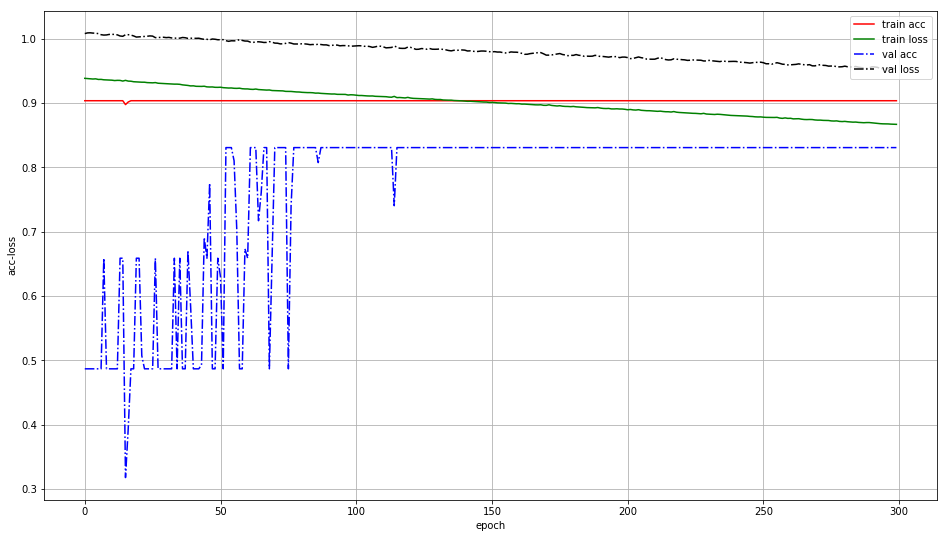

In [10]:
#绘制acc-loss曲线
plt.rcParams['figure.figsize'] = (16.0, 9.0) # set default size of plots
history.loss_plot('epoch')